In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlp
import re

def name(cfg):
    n = "Scale "
    match = re.search(r'_f(\d+)_', cfg)
    s =  match.group(1) if match else ""
    n += s + "x"
    if "_infp1_" in cfg:
        n += " + Inf"
    return n

def fmtBytes(size):
    # 2**10 = 1024
    tmp = -size if size < 0 else size
    power = 2**10
    n = 0
    power_labels = {0 : '', 1: 'K', 2: 'M', 3: 'G', 4: 'T'}
    while tmp >= power:
        tmp /= power
        n += 1
    return "%s%d%s" % ("-" if size < 0 else "", tmp, power_labels[n])


def geo_mean(iterable):
    a = np.array(iterable)
    return np.prod(a, where=a>0)**(1.0/len(a))

def fmtByte(value, unit="B"):
    for unit in ["", "k", "M", "G", "T", "P"]:
        if value < 1024:
            return f"{value:.0f}{unit}"
        value /= 1024

In [177]:

stats_keys = {
    "{core}.commitStats0.numInsts" : "insts",
    "{core}.numCycles" : "cycles",

    "{core}.branchPred.mispredictDueToBTBMiss_0::total": "BTB Misses",
    "{core}.branchPred.mispredicted_0::total" : "BPU Misses",
    "{core}.branchPred.mispredictDueToPredictor_0::DirectCond" : "CBP Misses",
    
    "{core}.fetched" : "fetched",
    "{core}.decoded" : "decoded",
    "{core}.renamed" : "renamed",
    "{core}.dispatched" : "dispatched",
    "{core}.issued" : "issued",
    "{core}.executed" : "executed",
    "{core}.createdInst" : "createdInst",
    "{core}.squashedInROB" : "squashedInROB",


    "{core}.rob.retiredInst" : "retiredInst",
    "{core}.rob.squashedInst" : "squashedInst",
    "{core}.rob.squashedBr" : "squashedBr",
    "{core}.rob.squashedMemVio" : "squashedMemVio",
    # "{core}.rob.reconvHits" : "reconvHits",
    "{core}.rob.instSquashedBrMispLen::mean" : "instSquashedBrMispLen",
    "{core}.rob.instSquashedMemVioLen::mean" : "instSquashedMemVioLen",
    "{core}.rob.reconvHits" : "reconvHits",
    "{core}.rob.reconvMisses" : "reconvMisses",
    "{core}.rob.truePathLen::mean" : "truePathLen",
    "{core}.rob.falsePathLen::mean" : "falsePathLen",
    "{core}.rob.convergedPathLen::mean" : "convergedPathLen",
    "{core}.rob.matchLenBr::mean" : "matchLenBr",
    "{core}.rob.matchLenMemVio::mean" : "matchLenMemVio",
    "{core}.rob.noMatchLenBr::mean" : "noMatchLenBr",
    "{core}.rob.noMatchLenMemVio::mean" : "noMatchLenMemVio",
    "{core}.rob.convergedPathLen::mean" : "convergedPathLen",
    "{core}.rob.reconvMissLossLen::mean" : "reconvMissLossLen",
    "{core}.rob.shadowBrLen::mean" : "shadowBrLen",
    "{core}.rob.shadowMemVioLen::mean" : "shadowMemVioLen",
    # "{core}.rob.convergedPathLen::mean" : "convergedPathLen",
    "{core}.rob.instSquashedBrMisp" : "instSquashedBrMisp",
    "{core}.rob.instSquashedMemVio" : "instSquashedMemVio",
    "{core}.rob.truePath" : "truePath",
    "{core}.rob.falsePath" : "falsePath",
    "{core}.rob.convergedPath" : "convergedPath",
    "{core}.rob.convergedPathMemVio" : "convergedPathMemVio",
    "{core}.rob.matchBr" : "matchBr",
    "{core}.rob.noMatchBr" : "noMatchBr",
    "{core}.rob.matchMemVio" : "matchMemVio",
    "{core}.rob.noMatchMemVio" : "noMatchMemVio",
    "{core}.rob.resultsReadyBr" : "resultsReadyBr",
    "{core}.rob.resultsReadyMemVio" : "resultsReadyMemVio",
    "{core}.rob.resultsMatchBr" : "resultsMatchBr",
    "{core}.rob.resultsMatchMemVio" : "resultsMatchMemVio",
    "{core}.rob.reconvMissLoss" : "reconvMissLoss",
    "{core}.rob.shadowBr" : "shadowBr",
    "{core}.rob.shadowMemVio" : "shadowMemVio",

}





bms = [
    "nodeapp",
    # "mediawiki",
    # "compression",
    # "dacapo-spring",
    # "dacapo-luindex",
    # "dacapo-lusearch",
    # "renaissance-http", 
    # "renaissance-chirper",
    # "502.gcc_r.gcc-pp.opts-O3_-finline-limit_36000",
    "505.mcf_r.inp",
    # "523.xalancbmk_r.xalanc",
    # "531.deepsjeng_r.ref",
    # "541.leela_r.ref"
]



configs = [
    # "LF1_f1_w8_ppc1_infp0_RD_X1",
    # "LF1_f8_w64_ppc8_infp0_RD_X1"
    "LF1_f1_w8_ppc1_infp0_RD_R5",
    "LF1_f8_w64_ppc8_infp0_RD_R5"
]


bms = [
    "nodeapp",
    "mediawiki",
    "compression",
    "dacapo-spring",
    "dacapo-luindex",
    "dacapo-lusearch",
    "renaissance-http", 
    "renaissance-chirper",
    "502.gcc_r.gcc-pp.opts-O3_-finline-limit_36000",
    "505.mcf_r.inp",
    "523.xalancbmk_r.xalanc",
    "531.deepsjeng_r.ref",
    "541.leela_r.ref"
]



configs = [
    # "LF1_f1_w8_ppc1_infp0_RD_X1",
    # "LF1_f8_w64_ppc8_infp0_RD_X1"
    # "LF1_f1_w8_ppc1_infp0_RD_X2",
    # "LF1_f8_w64_ppc8_infp0_RD_X2"
    "LF1_f1_w8_ppc1_infp0_RD_X3",
    "LF1_f8_w64_ppc8_infp0_RD_X3"
    # "LF1_f8_w64_ppc8_infp1_RD_X1"
]

configs = [
    # "LF1_f1_w8_ppc1_infp0_RD_X1",
    # "LF1_f8_w64_ppc8_infp0_RD_X1"
    # "LF1_f1_w8_ppc1_infp0_RD_X2",
    # "LF1_f8_w64_ppc8_infp0_RD_X2"
    "LF2_f1_w8_ppc1_infp0_RD_X3",
    "LF2_f8_w64_ppc8_infp0_RD_X3",
    "LF2_f8_w64_ppc8_infp1_RD_X3",
]




# bms = [
#     "nodeapp",
#     "mediawiki",
#     "compression",
#     "dacapo-spring",
#     "dacapo-luindex",
#     "dacapo-lusearch",
#     # "renaissance-http", 
#     "renaissance-chirper",
#     # "502.gcc_r.gcc-pp.opts-O3_-finline-limit_36000",
#     "505.mcf_r.inp",
#     "523.xalancbmk_r.xalanc",
#     "531.deepsjeng_r.ref",
#     "541.leela_r.ref"
# ]



# configs = [
#     # "LF1_f1_w8_ppc1_infp0_RD_X1",
#     # "LF1_f8_w64_ppc8_infp0_RD_X1",
#     "LFfull_f1_w8_ppc1_infp0_RD_X3",
#     "LFfull_f2_w16_ppc2_infp0_RD_X3",
#     "LFfull_f4_w32_ppc4_infp0_RD_X3",
#     # "LFfull_f8_w64_ppc8_infp0_RD_X3",
#     # "LFfull_f8_w64_ppc8_infp1_RD_X3",
#     # "LF2_f8_w64_ppc8_infp1_RD_R5",
# ]




RES_DIR = "/home/david/g5/gem5-svr-bench/results_phx/arm64"
        #    /home/david/g5/gem5-svr-bench/results_phx/arm64/LF1_f1_w8_ppc1_infp0_RD_X1/nodeapp/stats.txt

data = {}

for cfg in configs:
    data[cfg] = {}
    for bm in bms:
        path = f"{RES_DIR}/{cfg}/{bm}/stats.txt"
        with open(path, "r") as f:
            stats = {}
            for line in f:
                try:
                    parts = line.split()
                    stat_name = parts[0]
                    stat_value = parts[1]
                    stats[stat_name] = float(stat_value)
                except:
                    continue
            data[cfg][bm] = stats
        
        ## Map metrics
        for metric in stats_keys.keys():
            spec = bm.startswith("5")
            mm = metric.format(core="board.processor.cores.core" if spec else "board.processor.cores1.core")
            if mm not in data[cfg][bm]:
                print(f"Warning: Metric {mm} not found in {cfg}/{bm}")
            else:
                data[cfg][bm][stats_keys[metric]] = data[cfg][bm][mm]

        ## Compute derived metrics
        data[cfg][bm]["IPC"] = data[cfg][bm]["insts"] / data[cfg][bm]["cycles"]
        data[cfg][bm]["BPU MPKI"] = 1000 * data[cfg][bm]["BPU Misses"] / data[cfg][bm]["insts"]
        data[cfg][bm]["BTB MPKI"] = 1000 * data[cfg][bm]["BTB Misses"] / data[cfg][bm]["insts"]
        data[cfg][bm]["CBP MPKI"] = 1000 * data[cfg][bm]["CBP Misses"] / data[cfg][bm]["insts"]


        data[cfg][bm]["reconvHitRatio"] = data[cfg][bm]["reconvHits"] / (data[cfg][bm]["reconvHits"] + data[cfg][bm]["reconvMisses"])
        data[cfg][bm]["matchBrRatio"] = data[cfg][bm]["matchBr"] / (data[cfg][bm]["noMatchBr"] + data[cfg][bm]["matchBr"])
        data[cfg][bm]["resultsReadyBrRatio"] = data[cfg][bm]["resultsReadyBr"] / (data[cfg][bm]["noMatchBr"] + data[cfg][bm]["matchBr"])
        data[cfg][bm]["resultsMatchBrRatio"] = data[cfg][bm]["resultsMatchBr"] / (data[cfg][bm]["noMatchBr"] + data[cfg][bm]["matchBr"])
        msquashed = (data[cfg][bm]["noMatchMemVio"] + data[cfg][bm]["matchMemVio"])
        data[cfg][bm]["matchMemVioRatio"] = (data[cfg][bm]["matchMemVio"] / msquashed ) if msquashed > 0 else 0
        data[cfg][bm]["resultsReadyMemVioRatio"] = (data[cfg][bm]["resultsReadyMemVio"] / msquashed) if msquashed > 0 else 0
        data[cfg][bm]["resultsMatchMemVioRatio"] = (data[cfg][bm]["resultsMatchMemVio"] / msquashed) if msquashed > 0 else 0


    # ("fetched", "Fetched"),
    # ("decoded", "Decoded"),
    # ("renamed", "Renamed"),
    # ("dispatched", "Dispatched"),
    # ("issued", "Issued"),
    # ("executed", "Executed"),
    # ("createdInst", "Created"),
        data[cfg][bm]["squashedInst"] = data[cfg][bm]["createdInst"] - data[cfg][bm]["insts"]
        data[cfg][bm]["squashRate"] = data[cfg][bm]["squashedInst"] / data[cfg][bm]["createdInst"]
        sql = ["fetched", "decoded", "renamed", "dispatched", "issued", "executed"]
        data[cfg][bm]["sqAll"] = 0
        for m in sql:
            data[cfg][bm]["sqAll"] += data[cfg][bm][m]
        # data[cfg][bm]["sqAll"] = data[cfg][bm]["fetched"]
        


data[cfg][bm]["IPC"]

2.9586973816910613

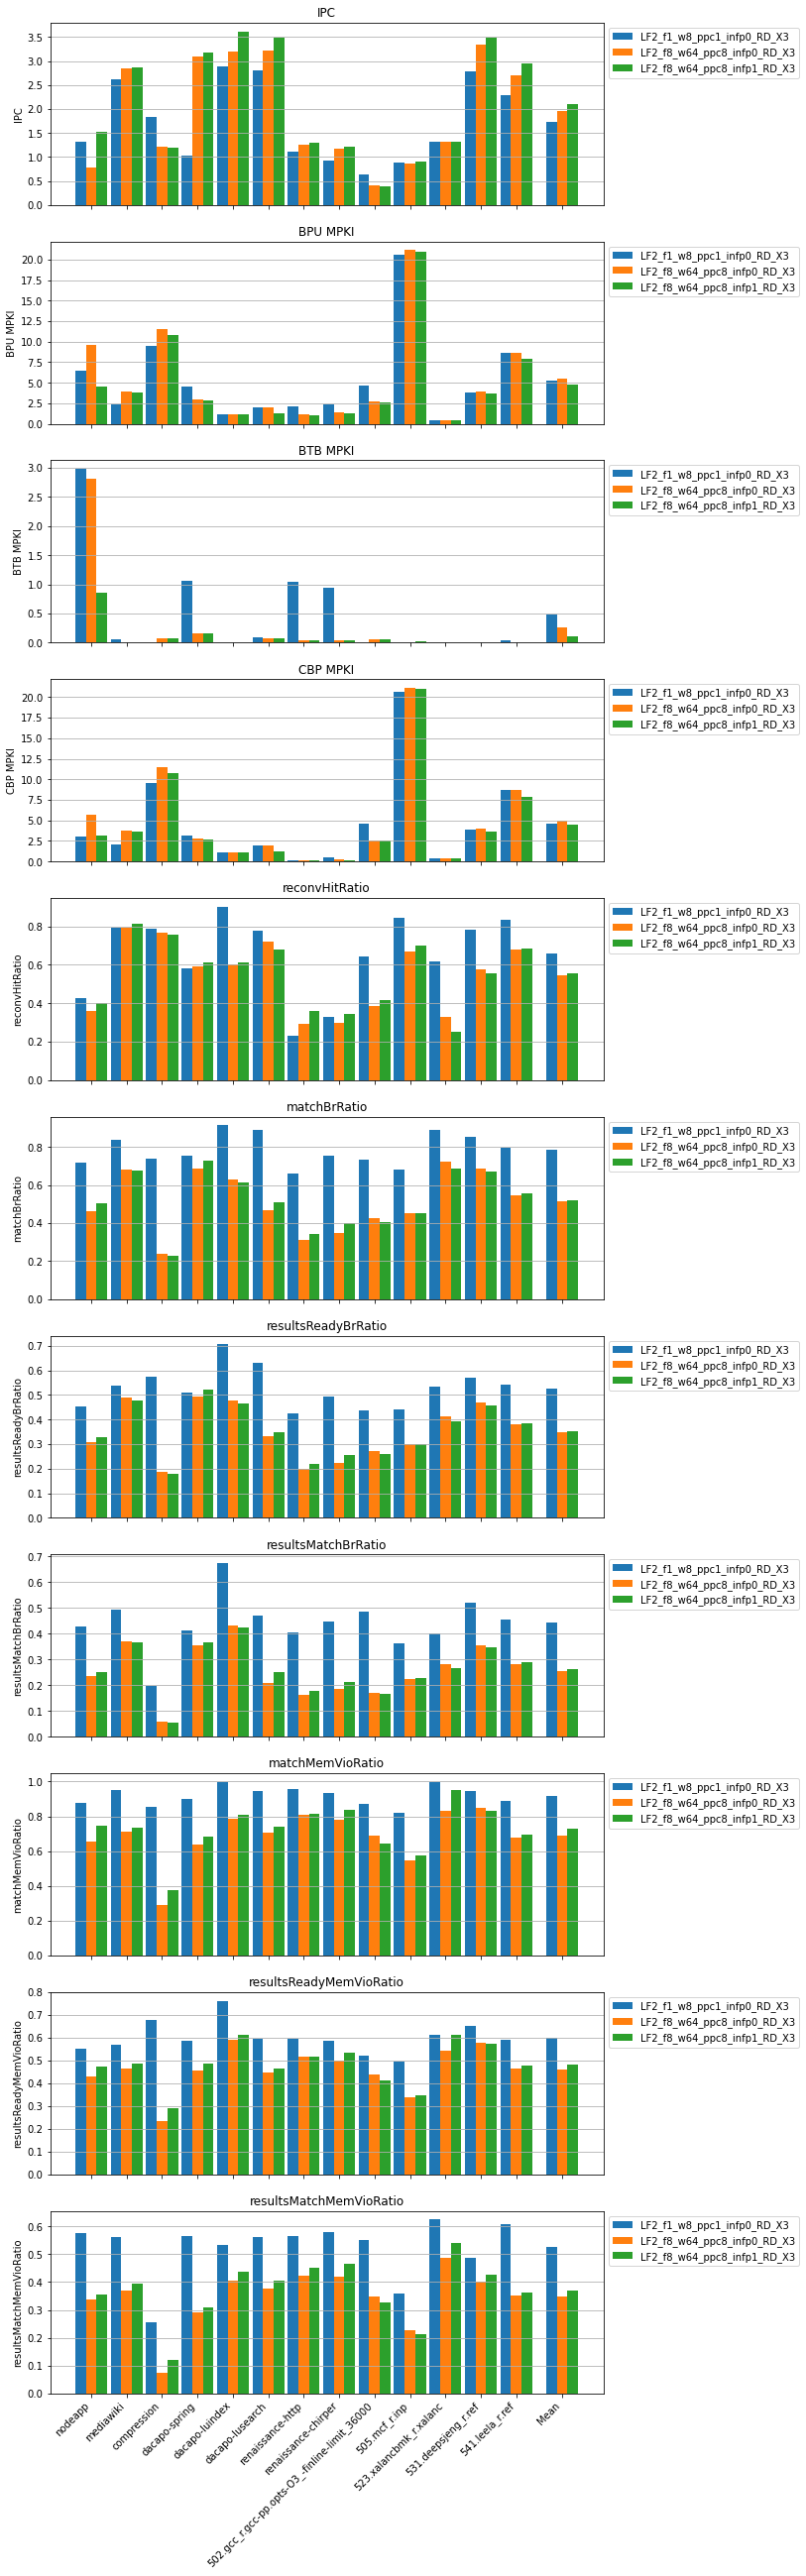

In [178]:

metrics = [
    "IPC",
    "BPU MPKI",
    "BTB MPKI",
    "CBP MPKI",
    "reconvHitRatio",
    "matchBrRatio",
    "resultsReadyBrRatio",
    "resultsMatchBrRatio",
    "matchMemVioRatio",
    "resultsReadyMemVioRatio",
    "resultsMatchMemVioRatio",
]


sc=10
fig, axs = mlp.subplots(len(metrics), 1, figsize=(sc, sc*len(metrics)*0.4), sharex=True)

width = 0.9/len(configs)  # the width of the bars

plot_mean = True

x = np.arange(len(bms))  # the label locations
if plot_mean:
    x = x.tolist() + [len(bms) + 0.3]


for i, metric in enumerate(metrics):
    ax = axs[i]

    for j, cfg in enumerate(configs):
        y = [data[cfg][bm][metric] for bm in bms]
        if plot_mean:
            y += [np.mean(y)]

        ax.bar(x=np.array(x) + j*width - (len(configs)-1)*width/2, height=y, width=width, label=cfg)
            


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(metric)
    ax.set_title(metric)
    ax.set_xticks(x)
    ax.grid(axis='y')

    _bms = bms + (["Mean"] if plot_mean else [])
    ax.set_xticklabels(_bms, rotation=45, ha='right')


    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))





# Cost of pipeline flushes

['Scale 1x', 'Scale 8x', 'Scale 8x + Inf', 'Fetched', 'Committed']


[Text(0.0, 0, 'nodeapp'),
 Text(1.0, 0, 'mediawiki'),
 Text(2.0, 0, 'compression'),
 Text(3.0, 0, 'dacapo-spring'),
 Text(4.0, 0, 'dacapo-luindex'),
 Text(5.0, 0, 'dacapo-lusearch'),
 Text(6.0, 0, 'renaissance-http'),
 Text(7.0, 0, 'renaissance-chirper'),
 Text(8.0, 0, '502.gcc_r.gcc-pp.opts-O3_-finline-limit_36000'),
 Text(9.0, 0, '505.mcf_r.inp'),
 Text(10.0, 0, '523.xalancbmk_r.xalanc'),
 Text(11.0, 0, '531.deepsjeng_r.ref'),
 Text(12.0, 0, '541.leela_r.ref'),
 Text(13.3, 0, 'Mean')]

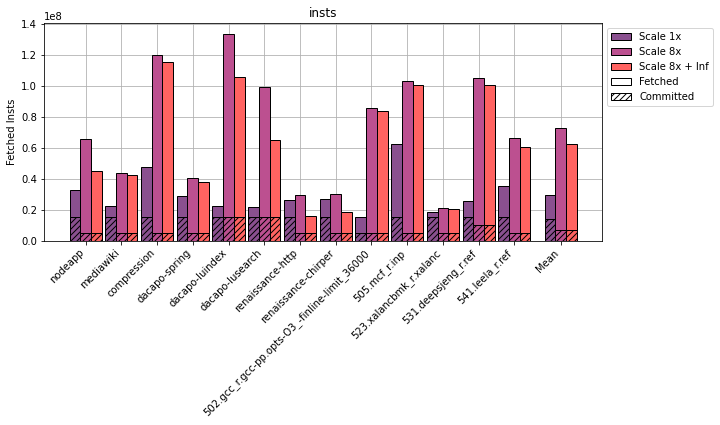

In [179]:

colors = ["#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380","#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380"]
# colors = ["#9ac5d3","#141e26","#cbd8df","#159ab7","#1e5067"]
hatches = ["","////","\\\\\\\\","xxxx","----","++++","****","....","oooo","||||"]

metrics = [
    ("createdInst", "Fetched"),
    # ("retiredInst", "retiredInst"),
    ("insts", "Committed"),
]

# configs2 = [
#     # "LF1_f1_w8_ppc1_infp0_RD_X1",
#     # "LF1_f8_w64_ppc8_infp0_RD_X1",
#     ("LFfull_f1_w8_ppc1_infp0_RD_X3", "Scale 1x"),
#     ("LFfull_f2_w16_ppc2_infp0_RD_X3", "Scale 2x"),
#     ("LFfull_f4_w32_ppc4_infp0_RD_X3", "Scale 4x"),
#     ("LFfull_f8_w64_ppc8_infp0_RD_X3", "Scale 8x"),
#     ("LFfull_f8_w64_ppc8_infp1_RD_X3", "Scale 8x + Inf"),
# ]


sc=10
fig, ax = mlp.subplots(1, 1, figsize=(sc, sc*0.4), sharex=True)

width = 0.9/len(configs)  # the width of the bars

plot_mean = True

relative=True
relative=False


x = np.arange(len(bms))  # the label locations
if plot_mean:
    x = x.tolist() + [len(bms) + 0.3]


rel = None

for j, cfg in enumerate(configs):
    bottoms = np.zeros(len(x))
    for i, (metric, mname) in enumerate(metrics):
        y = [data[cfg][bm][metric] for bm in bms]
        if plot_mean:
            y += [np.mean(y)]
        y = np.array(y)
        
        if rel is None:
            rel = y
        if relative:
            y = y / rel

        ax.bar(x=np.array(x) + j*width - (len(configs)-1)*width/2, 
               height=y, 
               width=width, label=mname if j==0 else None,
               color=colors[j], 
               hatch=hatches[i], edgecolor='black', zorder=2
               )
        bottoms += np.array(y)

patches = [mlp.Rectangle((0,0),1,1, edgecolor="k", facecolor=colors[i]) for i in range(len(configs))]
# labels = [m[1] for m in configs2]
labels = [name(cfg) for cfg in configs]
patches += [mlp.Rectangle((0,0),1,1, edgecolor="k", facecolor="w", hatch=hatches[i]) for i in range(len(metrics))]
labels += [cfg[1] for cfg in metrics]

print(labels)

ax.legend(patches, labels, loc='upper left', bbox_to_anchor=(1, 1))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Fetched Insts")
ax.set_title(metric)
ax.set_xticks(x)
ax.grid()
# ax.set_minor_locator(mlp.AutoMinorLocator())
ax.grid(which='minor', linestyle=':', linewidth='0.5', zorder=1)

_bms = bms + (["Mean"] if plot_mean else [])
ax.set_xticklabels(_bms, rotation=45, ha='right')


# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))



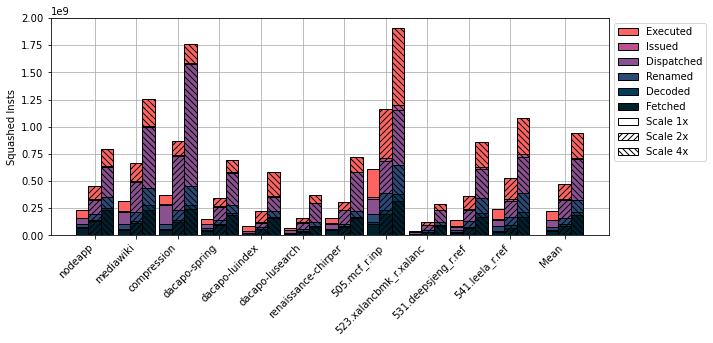

In [ ]:

colors = ["#00202e","#003f5c","#2c4875","#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380"]
# colors = ["#9ac5d3","#141e26","#cbd8df","#159ab7","#1e5067"]
hatches = ["","////","\\\\\\\\","xxxx","----","++++","****","....","oooo","||||"]

metrics = [
    ("fetched", "Fetched"),
    ("decoded", "Decoded"),
    ("renamed", "Renamed"),
    ("dispatched", "Dispatched"),
    ("issued", "Issued"),
    ("executed", "Executed"),
    # ("retiredInst", "Retired"),
]



sc=10
fig, ax = mlp.subplots(1, 1, figsize=(sc, sc*0.4), sharex=True)

width = 0.9/len(configs)  # the width of the bars

plot_mean = True

relative=True
relative=False


x = np.arange(len(bms))  # the label locations
if plot_mean:
    x = x.tolist() + [len(bms) + 0.3]

for j, cfg in enumerate(configs):
    bottoms = np.zeros(len(x))
    ry = [data[cfg][bm]["squashedInst"] for bm in bms]
    if plot_mean:
        ry += [np.mean(ry)]
    ry = np.array(ry)
    
    for i, (metric, mname) in enumerate(metrics):
        y = [data[cfg][bm][metric] for bm in bms]
        if plot_mean:
            y += [np.mean(y)]
        y = np.array(y)
        if relative:
            y = y / ry


        ax.bar(x=np.array(x) + j*width - (len(configs)-1)*width/2, 
               height=y, bottom=bottoms,
               width=width, label=mname if j==0 else None,
               color=colors[i], 
               hatch=hatches[j], edgecolor='black', zorder=2
               )
        bottoms += y


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Squashed Insts")
# ax.set_title(metric)
ax.set_xticks(x)
ax.grid()
# ax.set_minor_locator(mlp.AutoMinorLocator())
ax.grid(which='minor', linestyle=':', linewidth='0.5', zorder=1)

_bms = bms + (["Mean"] if plot_mean else [])
ax.set_xticklabels(_bms, rotation=45, ha='right')

patches = [mlp.Rectangle((0,0),1,1, edgecolor="k", facecolor=colors[i]) for i in range(len(metrics))]
metrics = [m[1] for m in metrics]
patches, metrics = patches[::-1], metrics[::-1]
patches += [mlp.Rectangle((0,0),1,1, edgecolor="k", facecolor="w", hatch=hatches[i]) for i in range(len(configs))]
metrics += [name(cfg) for cfg in configs]
# print(metrics)

ax.legend(patches, metrics, loc='upper left', bbox_to_anchor=(1, 1))



LFfull_f1_w8_ppc1_infp0_RD_X3 falsePath [12626766.0, 42828015.0, 26057343.0, 8185839.0, 11156492.0, 10832483.0, 7623756.0, 57825114.0, 1878579.0, 11772648.0, 26169195.0, 19723293.636363637]
LFfull_f1_w8_ppc1_infp0_RD_X3 matchBr [44843637.0, 41398542.0, 132061224.0, 28646823.0, 43005024.0, 22201192.0, 25831417.0, 211054162.0, 11730621.0, 49895553.0, 96880001.0, 64322563.27272727]
LFfull_f1_w8_ppc1_infp0_RD_X3 noMatchBr [18509072.0, 65734118.0, 49739968.0, 10040391.0, 3835248.0, 3311133.0, 13851370.0, 100514548.0, 4492209.0, 8907087.0, 23804073.0, 27521747.0]
LFfull_f1_w8_ppc1_infp0_RD_X3 reconvMissLoss [21282532.0, 20154099.0, 11635063.0, 12870309.0, 960270.0, 2184505.0, 19557671.0, 941841.0, 1754219.0, 4174281.0, 5858750.0, 9215776.363636363]
LFfull_f1_w8_ppc1_infp0_RD_X3 shadowBr [31157922.0, 25711394.0, 57960860.0, 19054848.0, 2118362.0, 6596382.0, 21207464.0, 60857115.0, 4507635.0, 9430854.0, 11847142.0, 22768179.818181816]
LFfull_f2_w16_ppc2_infp0_RD_X3 falsePath [19075526.0, 56209

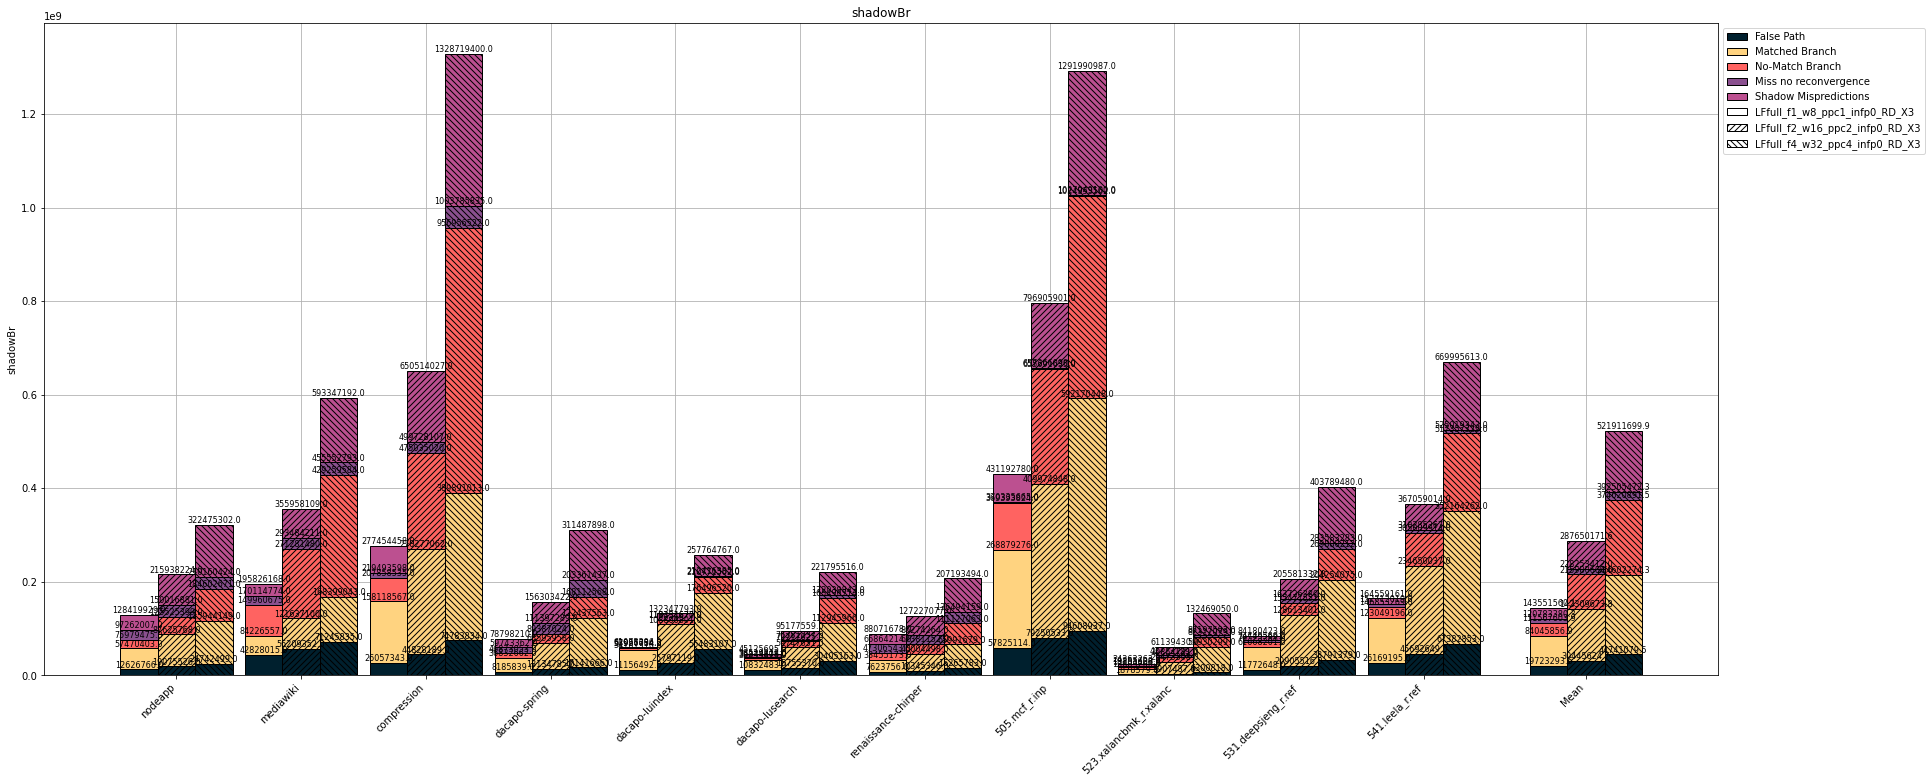

In [168]:

colors = ["#00202e","#003f5c","#2c4875","#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380"]
colors = ["#00202e","#ffd380","#ff6361","#8a508f","#bc5090","#ff6361","#ff8531","#ffa600","#ffd380"]
# colors = ["#9ac5d3","#141e26","#cbd8df","#159ab7","#1e5067"]
hatches = ["","////","\\\\\\\\","xxxx","----","++++","****","....","oooo","||||"]



## Total

metrics = [

    # ("instSquashedMemVio", "Total Squashed per MemVio"),
    ("matchMemVio", "Matched MemVio"),
    ("noMatchMemVio", "No-Match MemVio"),
    ("shadowMemVio", "Shadow MemVio"),
    # ("convergedPathLen", "Converged Path Length"),

]

metrics = [

    ## Br
    # ("instSquashedBrMisp", "Total Squashed per Branch Mispredict"),

    # ("truePathLen", "True Path Length"),
    ## FP Squashed
    ("falsePath", "False Path "),
    ("matchBr", "Matched Branch "),
    ("noMatchBr", "No-Match Branch "),

    ("reconvMissLoss", "Miss no reconvergence"),
    ("shadowBr", "Shadow Mispredictions"),

]


# ### Length distribution

# metrics = [
#     # ("instSquashedMemVioLen", "Total Squashed per MemVio"),
#     ("matchLenMemVio", "Matched MemVio Length"),
#     ("noMatchLenMemVio", "No-Match MemVio Length"),
#     # ("convergedPathLen", "Converged Path Length"),
#     # ("retiredInst", "Retired"),
# ]

# metrics = [

#     ## Br
#     # ("instSquashedBrMispLen", "Total Squashed per Branch Mispredict"),

#     # ("truePathLen", "True Path Length"),
#     ## FP Squashed
#     ("falsePathLen", "False Path Length"),
#     ("matchLenBr", "Matched Branch Length"),
#     ("noMatchLenBr", "No-Match Branch Length"),

#     # ("reconvMissLossLen", "Miss no reconvergence"),
#     # ("shadowBrLen", "Miss no reconvergence"),

# ]


sc=30
fig, ax = mlp.subplots(1, 1, figsize=(sc, sc*0.4), sharex=True)

width = 0.9/len(configs)  # the width of the bars

plot_mean = True

x = np.arange(len(bms))  # the label locations
if plot_mean:
    x = x.tolist() + [len(bms) + 0.3]

for j, cfg in enumerate(configs):
    bottoms = np.zeros(len(x))
    for i, (metric, mname) in enumerate(metrics):
        y = [data[cfg][bm][metric] for bm in bms]
        if plot_mean:
            y += [np.mean(y)]

        print(cfg, metric, y)
        ax.bar(x=np.array(x) + j*width - (len(configs)-1)*width/2, 
               height=y, bottom=bottoms,
               width=width, label=mname if j==0 else None,
               color=colors[i], 
               hatch=hatches[j], edgecolor='black', zorder=2
               )
        bottoms += np.array(y)


patches = [mlp.Rectangle((0,0),1,1, edgecolor="k", facecolor=colors[i]) for i in range(len(metrics))]
metrics = [m[1] for m in metrics]
patches += [mlp.Rectangle((0,0),1,1, edgecolor="k", facecolor="w", hatch=hatches[i]) for i in range(len(configs))]
metrics += [cfg for cfg in configs]
# print(metrics)

ax.legend(patches, metrics, loc='upper left', bbox_to_anchor=(1, 1))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(metric)
ax.set_title(metric)
ax.set_xticks(x)
ax.grid()
# ax.set_minor_locator(mlp.AutoMinorLocator())
ax.grid(which='minor', linestyle=':', linewidth='0.5', zorder=1)

_bms = bms + (["Mean"] if plot_mean else [])
ax.set_xticklabels(_bms, rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type="edge", fontsize=8, zorder=3)

# ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

